# Análisis de datos para Y.Afisha

## Introducción

El ojetivo del presente análisis consiste en evaluar los registros de visitas a Y.Afisha para un período dado, y analizar los gastos de marketing a fin de optimizarlos.  
Se cuenta con:  
* Un dataset que contiene datos de las visitas a la aplicación entre Junio del 2017 hasta junio del 2018 (1 año de registros).  
* Un dataset con los pedidos e ingresos de clientes para dicho período.  
* Un dataset con los costos de marketing en el mismo período, para las distintas fuentes de anuncios en las cuales se invierte.  

Se investigará, en términos generales, lo siguiente:  
* cómo los clientes usan el servicio;
* cuándo empiezan a comprar;
* cuánto dinero aporta cada cliente a la compañía;
* cuándo los ingresos cubren el costo de adquisición de los clientes.  

Finalmente, se hará un resumen de los resultados obtenidos en el análisis, con las observaciones y conclusiones de cada fase del mismo, y se realizarán recomendaciones y sugerencias al departamento de marketing, a fin de optimizar los gastos y mejorar la rentabilidad.

## Importación de librerías

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Paso 1: Preparación de datos

### Optimización de datasets

#### Dataset "Visits"

Evalúo primeramente el dataset, el tipo de datos y su tamaño.

In [2]:
df_visits = pd.read_csv('./datasets/visits_log_us.csv')
display(df_visits.head())
df_visits.info(memory_usage='deep')

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 71.1 MB


In [3]:
df_visits['Device'].value_counts()

Device
desktop    262567
touch       96833
Name: count, dtype: int64

Optimizo el dataset convirtiendo los datos de las columnas tipo "object" a los tipo de datos correctos. Para los datos de la columna "Device", los mismos pueden convertirse al tipo de dato "category", mientras que los datos de las columnas "End Ts" y "Start TS", al ser fechas, se pueden convertir al tipo de dato "datetime"

In [4]:
df_visits = pd.read_csv('./datasets/visits_log_us.csv', dtype={'Device': 'category'}, parse_dates=['Start Ts', 'End Ts'])
display(df_visits.head())
df_visits.info(memory_usage='deep')

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


#### Dataset "Orders"

Evalúo primeramente el dataset, el tipo de datos y su tamaño.

In [5]:
df_orders = pd.read_csv('./datasets/orders_log_us.csv')
display(df_orders.head())
df_orders.info(memory_usage='deep')

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.0 MB


Para este dataset, la conversión de datos sería solamente en la columna de "Buy Ts", que contiene fechas.

In [6]:
df_orders = pd.read_csv('./datasets/orders_log_us.csv', parse_dates=['Buy Ts'])
display(df_orders.head())
df_orders.info(memory_usage='deep')

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


#### Dataset "Costs"

Evalúo primeramente el dataset, el tipo de datos y su tamaño.

In [7]:
df_costs = pd.read_csv('./datasets/costs_us.csv')
display(df_costs.head())
df_costs.info(memory_usage='deep')

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 186.3 KB


Para este dataset, la conversión de datos sería solamente en la columna de "dt", que contiene fechas.

In [8]:
df_costs = pd.read_csv('./datasets/costs_us.csv', parse_dates=['dt'])
display(df_costs.head())
df_costs.info(memory_usage='deep')

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


### Visualización de datos y detección de errores

Para cada dataset, se aplicará una función para detectar errores en los datos, y ajustar los nombres de las columnas al formato 'snake_case'.  
Posteriormente, se hará una visualización de los datos, y exploración inicial de los mismos con el método describe().

In [9]:
def error_detection(df): #Función para detectar errores en dataset y convertir todos los títulos de columnas en convención snake_case
    #Detección de valores ausentes por columna:
    for column in df:
        print(f'Valores ausentes en columna {column}:', df[column].isna().sum())
    print()
    #Detección de filas duplicadas:
    print('Cantidad de filas duplicadas:', df.duplicated().sum())
    print()
    #Cambiar formato erróneo en nombres de columnas:
    new_col_name = {}
    for column in df:
        new_col_name[column]= column.strip().lower().replace(' ', '_')
    df.rename(columns=new_col_name, inplace=True)
    return df

#### Dataset "Visits"

Detección de errores:

In [10]:
error_detection(df_visits)

Valores ausentes en columna Device: 0
Valores ausentes en columna End Ts: 0
Valores ausentes en columna Source Id: 0
Valores ausentes en columna Start Ts: 0
Valores ausentes en columna Uid: 0

Cantidad de filas duplicadas: 0



,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


Conclusión:  
* El dataset no presenta valores ausentes  
* El dataset no presenta filas duplicadas
* Los nombres de las columnas se modificaron para adoptar el estilo 'snake_case'

Dado que este dataset contiene datos de fechas de sesión, tipo de dispositivo, id de la fuente de anuncio e id de usuario, aplicar el método describe() no representaría información útil para el análisis, por lo que no se aplica el mismo al presente dataset

#### Dataset "Orders"

Detección de errores:

In [11]:
error_detection(df_orders)

Valores ausentes en columna Buy Ts: 0
Valores ausentes en columna Revenue: 0
Valores ausentes en columna Uid: 0

Cantidad de filas duplicadas: 0



,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


Conclusión:  
* El dataset no presenta valores ausentes  
* El dataset no presenta filas duplicadas
* Los nombres de las columnas se modificaron para adoptar el estilo 'snake_case'

Para este dataset, el método describe() puede ser útil para la columna 'revenue', por lo que se aplica a continuación únicamente para dicha columna:

In [12]:
df_orders['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

#### Dataset "Costs"

Detección de errores:

In [13]:
error_detection(df_costs)

Valores ausentes en columna source_id: 0
Valores ausentes en columna dt: 0
Valores ausentes en columna costs: 0

Cantidad de filas duplicadas: 0



,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


Conclusión:  
* El dataset no presenta valores ausentes  
* El dataset no presenta filas duplicadas
* Los nombres de las columnas ya respetaban el estilo 'snake_case'

Para este dataset, el método describe() puede ser útil para la columna 'costs', por lo que se aplica a continuación únicamente para dicha columna:

In [14]:
df_costs['costs'].describe()

count    2542.000000
mean      129.477427
std       156.296628
min         0.540000
25%        21.945000
50%        77.295000
75%       170.065000
max      1788.280000
Name: costs, dtype: float64

## Paso 2: Informes y métricas

### Visitas

#### ¿Cuántas personas lo usan cada día, semana y mes?

Se evaluará la actividad de los usuarios a través de las métricas:  
* DAU: usuarios activos diarios  
* WAU: usuarios activos semanales  
* MAU: usuarios activos mensuales.

In [15]:
df_visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [16]:
#Se generan primeramente columnas en el DataFrame para los valores de año, mes, semana y día
df_visits['session_year'] = df_visits['start_ts'].dt.year
df_visits['session_month'] = df_visits['start_ts'].dt.month
df_visits['session_week'] = df_visits['start_ts'].dt.isocalendar().week
df_visits['session_date'] = df_visits['start_ts'].dt.date
df_visits['session_date'] = pd.to_datetime(df_visits['session_date'])

df_visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


In [17]:
#Se agrupan los datos por día, semana y mes, y se calculan los promedios para calcular las métricas
dau_mean = df_visits.groupby('session_date').agg({'uid':'nunique'}).mean()
wau_mean = df_visits.groupby(['session_year', 'session_week']).agg({'uid':'nunique'}).mean()
mau_mean = df_visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).mean()

print('DAU (Cantidad de usuarios diarios promedio):', int(dau_mean.iloc[0]))
print('WAU (Cantidad de usuarios semanales promedio):', int(wau_mean.iloc[0]))
print('MAU (Cantidad de usuarios mensuales promedio):', int(mau_mean.iloc[0]))

DAU (Cantidad de usuarios diarios promedio): 907
WAU (Cantidad de usuarios semanales promedio): 5716
MAU (Cantidad de usuarios mensuales promedio): 23228


#### ¿Cuántas sesiones hay por día?

Se determinará el número de sesiones diarias por usuario, calculando posteriormente el promedio, a fin de obtener el valor medio de dicha métrica para las visitas.

In [18]:
sessions_per_user = df_visits.groupby('session_date').agg({'uid':['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user.head(10)

,n_sessions,n_users,sessions_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
2017-06-06,875,797,1.097867
2017-06-07,788,699,1.127325
2017-06-08,939,868,1.081797
2017-06-09,755,695,1.086331


In [19]:
print('La cantidad de sesiones diarias por usuario, en promedio es de:', sessions_per_user['sessions_per_user'].mean())

La cantidad de sesiones diarias por usuario, en promedio es de: 1.082169644003972


#### ¿Cuál es la duración de cada sesión?

A continuación, se calculará la duración promedio de la sesión (ASL).

In [20]:
df_visits['session_duration_sec'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.seconds
print('ASL (duración promedio de la sesión):', round(df_visits['session_duration_sec'].mean(), 2), 'segundos')

ASL (duración promedio de la sesión): 643.51 segundos


A continuación, se traza un histograma para analizar si el valor medio calculado es representativo o no, según sea su distribución.

<Axes: >

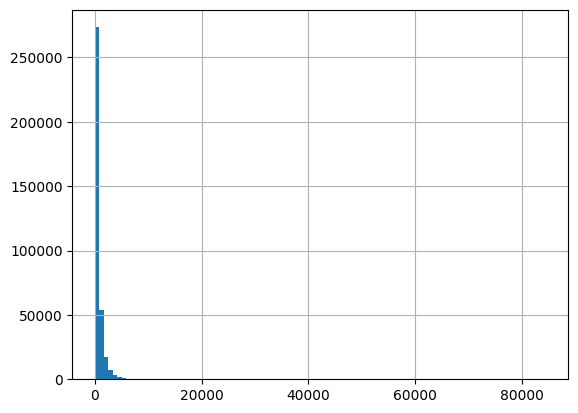

In [21]:
df_visits['session_duration_sec'].hist(bins=100)

La distribución de frecuencia no es 'normal', ni se asemeja a dicha distribución, por lo que, para determinar la métrica ASL, se calculará la moda, y no el promedio, ya que el mismo no es representativo.

In [22]:
print('Duración de sesión más frecuente:', round(df_visits['session_duration_sec'].mode().iloc[0], 2), 'segundos')

Duración de sesión más frecuente: 60 segundos


#### ¿Con qué frecuencia los usuarios regresan?

Para analizar el factor de adherencia ('sticky factor'), se utilizarán las siguientes métricas:  
* DAU / WAU  
* DAU / MAU

In [23]:
print('DAU / WAU :', round((dau_mean / wau_mean).iloc[0], 3) * 100, '%')
print('DAU / MAU :', round((dau_mean / mau_mean).iloc[0], 3) * 100, '%')


DAU / WAU : 15.9 %
DAU / MAU : 3.9 %


Conclusiones:  
* Uso usuarios:  
    * DAU (Cantidad de usuarios diarios promedio): 907  
    * WAU (Cantidad de usuarios semanales promedio): 5716  
    * MAU (Cantidad de usuarios mensuales promedio): 23228  
* Sesiones por día en promedio: 1.08 veces  
* Duración media de la sesión (se determina la más frecuente): 60 segundos  
* Factores de adherencia de los usuarios:  
    * Semanalmente: 15.9%  
    * Mensualmente: 3.9%  

Se observa que los usuarios no acceden a la aplicación con mucha frecuencia (1.08 veces por día en promedio), y que el tiempo de uso de la misma es, en su mayoría de veces, del orden de los 60 segundos.  

El retorno de los usuarios semanalmente es del orden del 16%, y mensualmente del orden del 4%.

### Ventas

#### ¿Cuándo los usuarios comienzan a comprar?

Se buscará conocer los tiempos de conversión en clientes de los usuarios. Para esto se analizarán los tiempos transcurridos entre la primera compra y la fecha de registro de dicho usuario.  
Posteriormente se agruparán en cohortes según los tiempos de conversión, a fin de analizar el comportamiento de los usuarios respecto a las compras, y cuál canal se prefiere para acceder y comprar.

In [24]:
#Visualizo primeramente los dataset de órdenes y visitas
display(df_orders.head())
display(df_visits.head())

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0


In [25]:
#Extraigo de la columna de buy_ts la fecha y la guardo en una nueva columna
df_orders['buy_date'] = df_orders['buy_ts'].dt.date
df_orders['buy_date'] = pd.to_datetime(df_orders['buy_date'])

#Genero un Series con las fechas de la primera compra por usuario
first_order_date = df_orders.groupby('uid')['buy_date'].min()
first_order_date.name = 'first_order_date'

#Genero un Series con la fecha de la primera sesión de cada usuario
first_session = df_visits.groupby('uid')['session_date'].min()
first_session.name = 'first_session_date'

#Uno el DataFrame de visitas con los dos Series anteriores
df_visits_with_first_session = df_visits.merge(first_session, on='uid')

df_visits_full = df_visits_with_first_session.merge(first_order_date, on='uid', how='outer')
print(df_visits_full.info())
df_visits_full.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   device                359400 non-null  category      
 1   end_ts                359400 non-null  datetime64[ns]
 2   source_id             359400 non-null  int64         
 3   start_ts              359400 non-null  datetime64[ns]
 4   uid                   359400 non-null  uint64        
 5   session_year          359400 non-null  int32         
 6   session_month         359400 non-null  int32         
 7   session_week          359400 non-null  UInt32        
 8   session_date          359400 non-null  datetime64[ns]
 9   session_duration_sec  359400 non-null  int32         
 10  first_session_date    359400 non-null  datetime64[ns]
 11  first_order_date      97394 non-null   datetime64[ns]
dtypes: UInt32(1), category(1), datetime64[ns](5), int32(3), in

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_session_date,first_order_date
0,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,11863502262781,2018,3,9,2018-03-01,360,2018-03-01,NaT
1,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,49537067089222,2018,2,6,2018-02-06,120,2018-02-06,NaT
2,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,297729379853735,2017,6,23,2017-06-07,60,2017-06-07,NaT
3,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,313578113262317,2018,3,10,2018-03-11,360,2017-09-18,2018-01-03
4,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,313578113262317,2017,9,38,2017-09-18,1080,2017-09-18,2018-01-03


In [26]:
#Calculo en una nueva columna el tiempo transcurrido entre la primera sesión y la primera compra de cada usuario
df_visits_full['time_to_event'] = df_visits_full['first_order_date'] - df_visits_full['first_session_date']
df_visits_full.sample(5)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_session_date,first_order_date,time_to_event
269240,touch,2017-11-26 05:16:00,4,2017-11-26 05:16:00,13710518149987252441,2017,11,47,2017-11-26,0,2017-11-26,NaT,NaT
68330,touch,2018-01-19 14:06:00,2,2018-01-19 12:27:00,3519106500619442726,2018,1,3,2018-01-19,5940,2018-01-15,NaT,NaT
282623,desktop,2017-11-30 07:36:00,3,2017-11-30 07:33:00,14414879729985570946,2017,11,48,2017-11-30,180,2017-08-30,NaT,NaT
343884,desktop,2017-11-06 18:17:00,3,2017-11-06 18:14:00,17639271175896533189,2017,11,45,2017-11-06,180,2017-11-06,NaT,NaT
176885,desktop,2017-12-04 01:14:00,1,2017-12-03 21:35:00,9080998903030041698,2017,12,48,2017-12-03,13140,2017-12-02,2017-12-04,2 days


A continuación, se aplica el método describe() a la columna con el tiempo transcurrido entre la primera sesión y la primera compra de cada usuario, para tener una visualización general de sus datos.

count                         97394
mean     33 days 17:07:48.028831345
std      63 days 08:21:25.214054532
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 1 days 00:00:00
75%                37 days 00:00:00
max               363 days 00:00:00
Name: time_to_event, dtype: object

,uid
time_to_event,
0 days,25039
1 days,1966
2 days,685
3 days,452
4 days,386
...,...
355 days,2
356 days,2
357 days,3


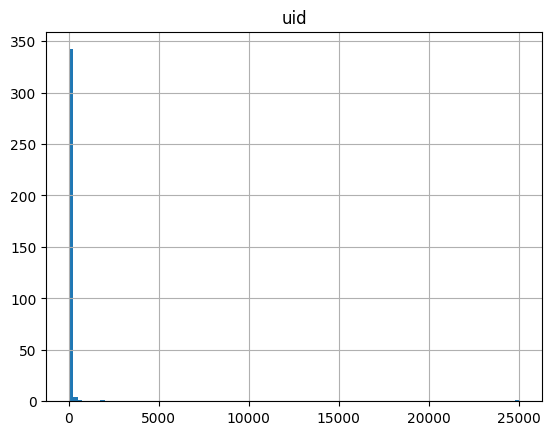

In [27]:
#Aplico el método describe() para visualizar los datos
display(df_visits_full['time_to_event'].describe())

#Agrupo por 'time_to_event' y calculo la cantidad de usuarios únicos para cada categoría. Trazo un histograma para visualizar gráficamente el Series.
display(df_visits_full.groupby('time_to_event').agg({'uid':'nunique'}))
df_visits_full.groupby('time_to_event').agg({'uid':'nunique'}).hist(bins=100)
plt.show()

Se observa que el 50% de los clientes que realizan una compra, lo hacen en el mismo día del registro, o al siguiente. Otro 25% lo hace en menos de cuarenta días, mientras que otro 25% puede llevar mucho más tiempo para realizar su primera compra.    

Para analizar las conversiones de los diferentes usuarios, y cuál es el canal más efectivo, se realizará el análisis de cohortes por comportamiento, en función del tiempo de conversión ('time_to_event'). Para la formación de cohortes se agregará la categoría correspondiente de cada usuario en una nueva columna del DataFrame, bajo las siguientes categorías:  
* Cohorte '0d': son los que realizaron la compra el mismo día del registro.  
* Cohorte '1d': son los que realizaron la compra un día después del registro.  
* Cohorte '7d': son los que realizaron la compra entre el tercero y séptimo día después del registro.
* Cohorte '30d': son los que realizaron la compra en la semana siguiente al registro, pero dentro del primer mes.  
* Cohorte '30d up': son los que realizaron la compra posteriormente al mes de registrarse.  
* Cohorte 'no buy': usuarios registrados sin haber realizado ninguna compra.  

In [28]:
df_visits_full.loc[df_visits_full['time_to_event'] == "0 days", 'cohort'] = '00d'
df_visits_full.loc[df_visits_full['time_to_event'] == "1 days", 'cohort'] = '01d'
df_visits_full.loc[(df_visits_full['time_to_event'] < "8 days") & (df_visits_full['time_to_event'] > "1 days"), 'cohort'] = '07d'
df_visits_full.loc[(df_visits_full['time_to_event'] < "31 days") & (df_visits_full['time_to_event'] > "7 days"), 'cohort'] = '30d'
df_visits_full.loc[df_visits_full['time_to_event'] > "30 days", 'cohort'] = '30d up'
df_visits_full.loc[df_visits_full['time_to_event'].isna(), 'cohort'] = 'no buy'

df_visits_full['cohort'] = df_visits_full['cohort'].astype('category')

df_visits_full.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   device                359400 non-null  category       
 1   end_ts                359400 non-null  datetime64[ns] 
 2   source_id             359400 non-null  int64          
 3   start_ts              359400 non-null  datetime64[ns] 
 4   uid                   359400 non-null  uint64         
 5   session_year          359400 non-null  int32          
 6   session_month         359400 non-null  int32          
 7   session_week          359400 non-null  UInt32         
 8   session_date          359400 non-null  datetime64[ns] 
 9   session_duration_sec  359400 non-null  int32          
 10  first_session_date    359400 non-null  datetime64[ns] 
 11  first_order_date      97394 non-null   datetime64[ns] 
 12  time_to_event         97394 non-null   timed

Se analizará primeramente las cantidades de usuarios de cada cohorte en función del canal usado.

cohort,00d,01d,07d,30d,30d up,no buy
device,,,,,,
desktop,21031,1587,1891,1846,4247,133921
touch,5128,587,763,737,1697,62433


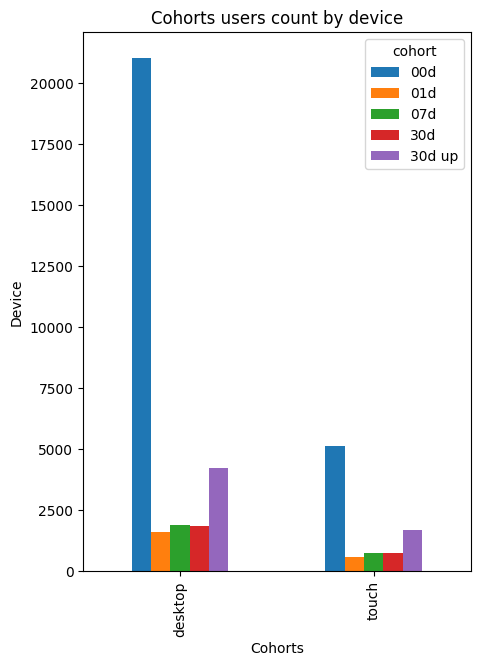

In [29]:
chanel_pivot = df_visits_full.pivot_table(index='device', columns='cohort', values='uid', aggfunc='nunique', observed=False)
display(chanel_pivot)
chanel_pivot[['00d', '01d', '07d', '30d', '30d up']].plot(kind='bar', title='Cohorts users count by device', xlabel='Cohorts', ylabel='Device', figsize=[5,7])
plt.show()

Se observa que el dispositivo de escritorio ('desktop') es el preferido en general para acceder a la aplicación, y que las compras a través del mismo superan notablemente a las compras realizadas por el dispositivo 'touch'. El tiempo de conversión no parece depender directamente del dispositivo, ya que, según se observa, las cantidades de usuarios de las distintas cohortes guardan una proporcionalidad para cada dispositivo.

Se analizará ahora cómo varían las cantidades de usuarios de cada cohorte considerando las fechas de registro, ya que las compras podrían depender de la versión de la aplicación utilizada.  
Para esto, se agruparán los usuarios también por cohortes mensuales, según la fecha de la primera sesión. Posteriormente se calcularán las cantidades de usuarios únicos en una tabla dinámica donde puedan observarse los que son comunes a ambas cohortes, a fin de analizar las conversiones según la fecha en la que se inició sesión por primera vez.

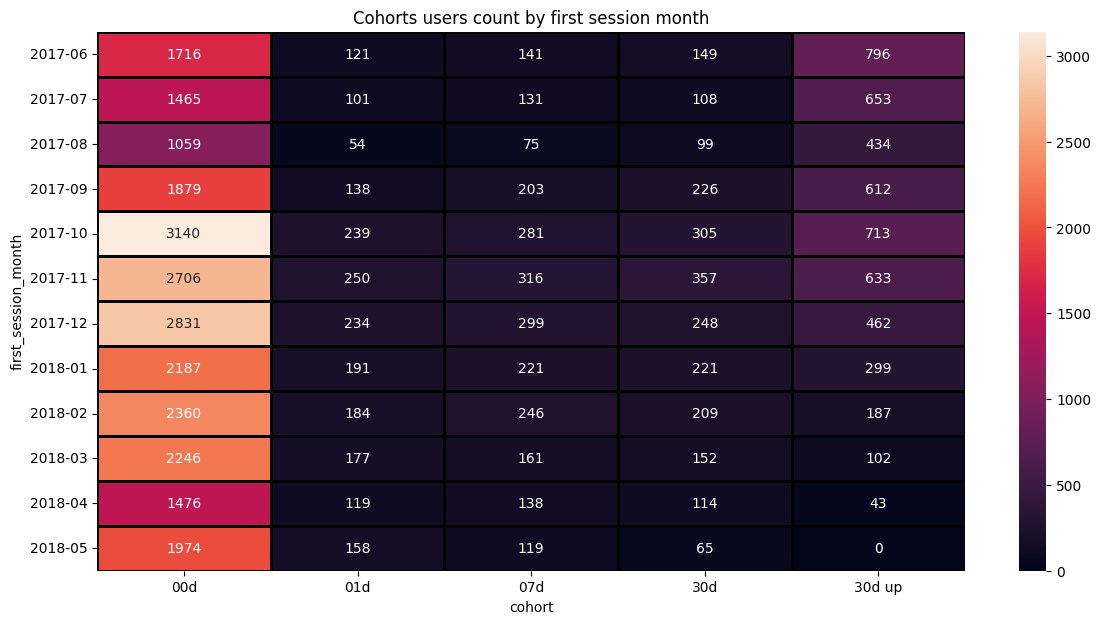

In [30]:
#Se obtiene la fecha mensual de la primera sesión
df_visits_full['first_session_month'] = df_visits_full['first_session_date'].dt.to_period('M')

#Se arma la tabla dinámica con ambos criterios de cohortes
cohorts_by_dates_pivot = df_visits_full.pivot_table(index='first_session_month', columns='cohort', values='uid', aggfunc='nunique', observed=False)

#Se representa la tabla dinámica para las cohortes que convirtieron en un mapa de calor
plt.figure(figsize=(14, 7))
plt.title('Cohorts users count by first session month')
sns.heatmap(cohorts_by_dates_pivot[['00d', '01d', '07d', '30d', '30d up']], annot=True, fmt='.0f', linewidths=2, linecolor='black')
plt.show()

Conclusiones:  
* Se observa que la mayor conversión de clientes se dio para quienes accedieron a la aplicación por primera vez en el mes de Octubre del 2017, y realizaron su primera compra en el mismo día.  
* Para los usuarios que ingresaron por primera vez en los siguientes meses, si bien la conversión en el día 0 fue mayor que los anteriores a Octubre del 2017, pero no igualó a la de dicho mes.  
* Para los usuarios que realizaron su primera compra en días posteriores a su primera sesión, también se observa que fue mayor su cantidad para los que habían tenido su primera sesión entre Octubre y Diciembre del 2017.  

Se debería evaluar las características de la versión de aplicación para dichas fechas, así como las calificaciones de usuarios, y analizar los cambios realizados respecto de las versiones anteriores (que fueron para bien) y los cambios realizados en las siguientes versiones (que no mejoraron las ventas, sino que las mismas decrecieron).

#### ¿Cuántos pedidos hacen durante un período de tiempo dado?

Se analizará ahora las cantidades de compras realizadas en función del tiempo, estudiando a los usuarios según sus respectivas cohortes de conversión.  
Para esto, se deberá unir al dataframe 'df_orders' la columna de cohortes de conversión.

In [31]:
#Extraigo los usuarios y sus cohortes en un nuevo dataframe, eliminando duplicados, a fin de tener solo los 'uid' únicos y sus cohortes.
df_cohorts_by_conversion = df_visits_full[['uid', 'cohort']].drop_duplicates()

#Fusiono ambos dataframes
df_orders_cohorts = df_orders.merge(df_cohorts_by_conversion, on='uid', how='left')

#Convierto el tipo de datos de la columna 'cohort' a 'str' primeramente, y luego vuelvo a convertirlo a 'category', a fin de eliminar la categoría 'no buy', que ya no se encuentra presente en el nuevo dataframe.
df_orders_cohorts['cohort'] = df_orders_cohorts['cohort'].astype('str')
df_orders_cohorts['cohort'] = df_orders_cohorts['cohort'].astype('category')

#Verifico que no haya valores de la categoría 'no buy' en el nuevo dataframe
print('Cohort unique values:')
print(df_orders_cohorts['cohort'].unique())

#Visualizo el nuevo dataframe
df_orders_cohorts

Cohort unique values:
['00d', '01d', '07d', '30d', '30d up']
Categories (5, object): ['00d', '01d', '07d', '30d', '30d up']


,buy_ts,revenue,uid,buy_date,cohort
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,00d
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,00d
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,00d
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,00d
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,00d
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,00d
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,00d
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,00d
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,30d up


Se evaluará la cantidad de pedidos que hacen los usuarios por mes. Para esto, se extraerá el mes de cada compra, a fin de agrupar las cantidades de compras según el mes en que se realizó.  
Posteriormente se creará una tabla dinámica para analizar la cantidad de pedidos hechos por los usuarios en función de su cohorte de conversión, y los meses en que se realizaron las compras.  
La tabla dinámica se representará con un mapa de calor, a fin de poder observar en forma gráfica las variaciones de las compras en el tiempo para cada cohorte.

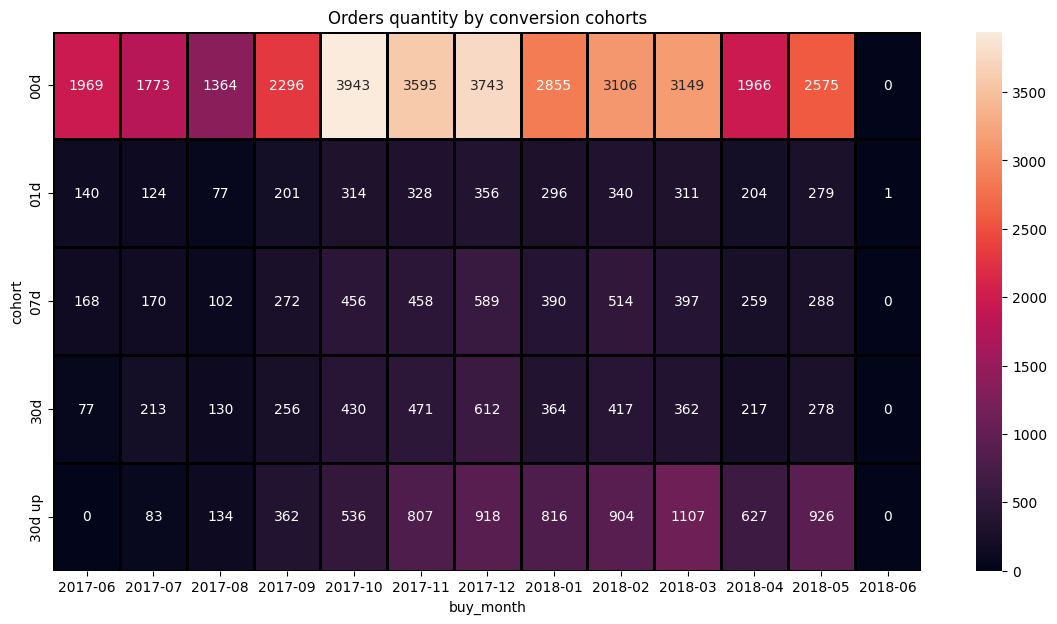

In [32]:
df_orders_cohorts['buy_month'] = df_orders_cohorts['buy_date'].dt.to_period('M')

#Se arma la tabla dinámica con ambos criterios de cohortes
buys_by_dates_and_cohorts = df_orders_cohorts.pivot_table(index='cohort', columns='buy_month', values='uid', aggfunc='count', observed=False)


#Se representa la tabla dinámica en un mapa de calor
plt.figure(figsize=(14, 7))
plt.title('Orders quantity by conversion cohorts')
sns.heatmap(buys_by_dates_and_cohorts, annot=True, fmt='.0f', linewidths=2, linecolor='black')
plt.show()

Conclusiones:  
* La cohorte que más compra realiza a lo largo del tiempo es la 00d.  
* Se observa que en los meses de octubre a diciembre del 2017 (los meses de mayor conversión), son también los meses que mayor cantidad de compras en general se hizo.  
* Se observa que la información obtenida al analizar según las cohortes de conversión no es muy representativa, y que no suma mucha información a la obtenida en el punto anterior.    

Por lo expuesto, a continuación se agruparán las cohortes en función de las fechas de la primera compra, analizando la variación de los pedidos en función de las mismas.

In [33]:
df_orders_cohorts = df_orders_cohorts.merge(first_order_date, on='uid')
df_orders_cohorts['first_order_month'] = df_orders_cohorts['first_order_date'].dt.to_period('M')

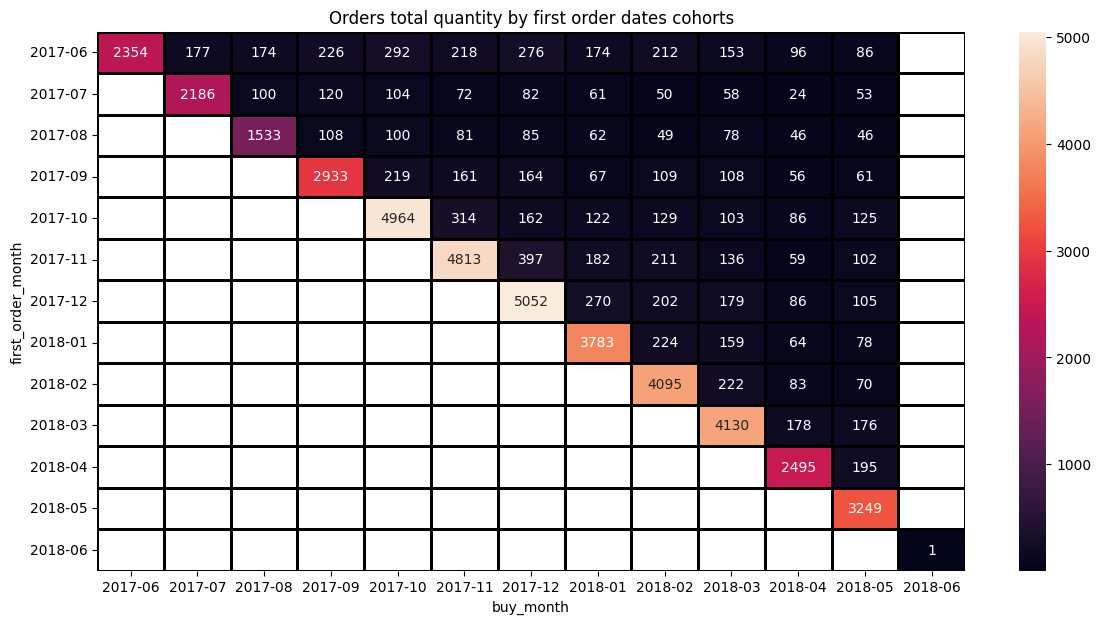

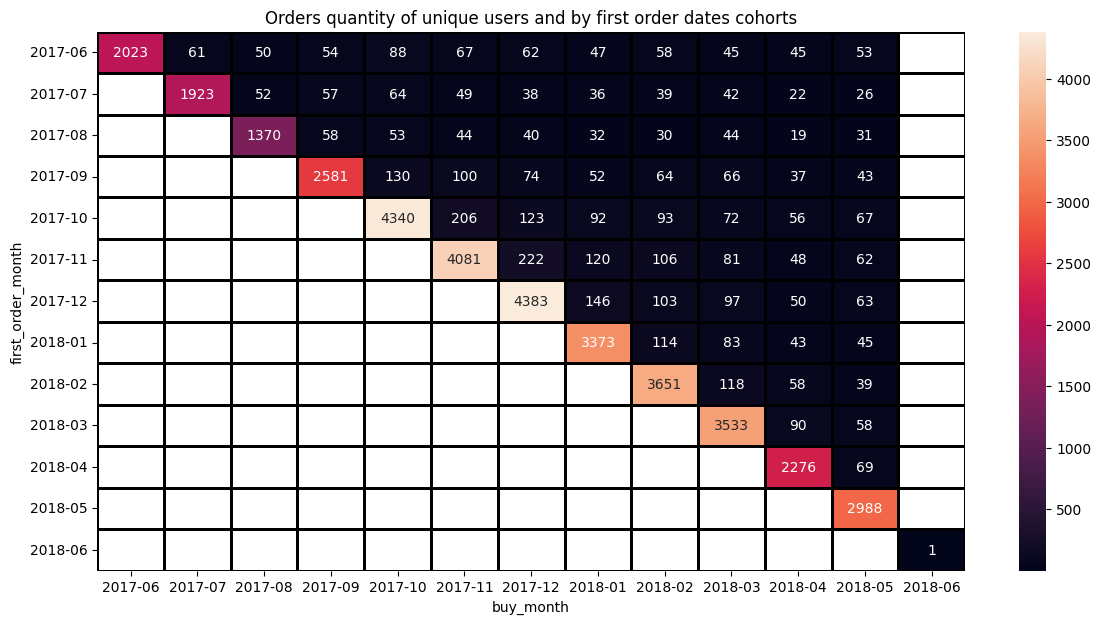

In [34]:
#Se genera una tabla dinámica para el total de todas las compras, sin discriminar por usuarios únicos
buys_by_dates_total = df_orders_cohorts.pivot_table(index='first_order_month', columns='buy_month', values='uid', aggfunc='count', observed=False)

#Se genera una tabla dinámica para el las compras realizadas por usuarios diferentes
buys_by_dates_unique = df_orders_cohorts.pivot_table(index='first_order_month', columns='buy_month', values='uid', aggfunc='nunique', observed=False)

#Se representan las tablas dinámicas en mapas de calor
plt.figure(figsize=(14, 7))
plt.title('Orders total quantity by first order dates cohorts')
sns.heatmap(buys_by_dates_total, annot=True, fmt='.0f', linewidths=1, linecolor='black')
plt.show()

plt.figure(figsize=(14, 7))
plt.title('Orders quantity of unique users and by first order dates cohorts')
sns.heatmap(buys_by_dates_unique, annot=True, fmt='.0f', linewidths=1, linecolor='black')
plt.show()

Conclusiones:  
* Se observa que, tal como se esperaba, la mayor cantidad de compras fueron realizadas en el mismo mes de la primera compra, y, considerando lo observado en el análisis por las cohortes de conversión, podemos estimar que la mayor parte de las mismas se realizaron el mismo día del registro (cohorte '00d'). Esto indica que son muy pocas las ventas realizadas a los mismos usuarios posteriormente al registro.  
* Se observa, al igual que en los casos anteriores, que en los meses de octubre a diciembre del 2017 se incrementaron las compras de los usuarios en general.  
* Se observa que la diferencia entre el total de compras realizadas respecto de las realizadas únicamente por usuarios diferentes no es significativa, por lo que se podría concluir que la mayor parte de los pedidos vienen de usuarios nuevos, lo cual también podría ser causante del hecho de que el mayor volumen de pedidos sean realizados en el día 0.

#### ¿Cuál es el tamaño promedio de compra?

Para determinar el tamaño promedio de compra, se evaluarán las mismas por las cohortes de conversión.

In [35]:
df_orders_cohorts.groupby('cohort').agg({'revenue':'mean'})

C:\Users\emili\AppData\Local\Temp\ipykernel_20328\3322377888.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_orders_cohorts.groupby('cohort').agg({'revenue':'mean'})


,revenue
cohort,
00d,4.548548
01d,4.983110
07d,5.069751
30d,7.838680
30d up,5.482355


Se observa que el tamaño promedio de la compra se encuentra comprendido entre $4.5 y $8.  
Se destaca que las compras promedio de la cohorte que convirtió en el mismo día de registro son las más bajas (aunque mayor cantidad de compras), mientras que las realizadas posteriormente a la primera semana, pero dentro del primer mes, son las más altas.  
Esto bien puede deberse a que los usuarios que compran más adelante en el tiempo pueden ser usuarios que ya compraron anteriormente y, por haber tenido una buena experiencia, tienen confianza en realizar una compra mayor.

#### ¿Cuánto dinero traen? (LTV)

El LTV (lifetime value en inglés) es el valor "de vida" del cliente. Es la cantidad total de dinero que un cliente aporta a la empresa en promedio al realizar compras. Es calculado con el beneficio bruto, por lo que se debe aplicar el margen de beneficio de la empresa. El mismo no se cuenta entre los datos disponibles, por lo que se supondrá un margen del 50% a los fines del análisis.  

Para el cálculo del LTV los usuarios se agruparán en cohortes según el mes de la primera compra.


In [36]:
#Primeramente visualizo el DataFrame de pedidos con el que se ha estado trabajando
df_orders_cohorts.head()

,buy_ts,revenue,uid,buy_date,cohort,buy_month,first_order_date,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,00d,2017-06,2017-06-01,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,00d,2017-06,2017-06-01,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,00d,2017-06,2017-06-01,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,00d,2017-06,2017-06-01,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,00d,2017-06,2017-06-01,2017-06


In [37]:
#Agrupo por el mes de la primera compra para formar las cohortes, y calculo el tamaño de las mismas (cantidad de compradores)
cohorts_size = df_orders_cohorts.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohorts_size.columns = ['first_order_month', 'n_buyers']
cohorts_size

,first_order_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340
5,2017-11,4081
6,2017-12,4383
7,2018-01,3373
8,2018-02,3651
9,2018-03,3533


In [38]:
#Agrupo por el mes de la primera compra y por mes de compra, y calculo la suma de los ingresos de la cohorte en el mismo mes
cohorts = df_orders_cohorts.groupby(['first_order_month','buy_month']).agg({'revenue':'sum'}).reset_index()
cohorts.head()

,first_order_month,buy_month,revenue
0,2017-06,2017-06,9557.49
1,2017-06,2017-07,981.82
2,2017-06,2017-08,885.34
3,2017-06,2017-09,1931.30
4,2017-06,2017-10,2068.58


In [39]:
#Armo el DataFrame del reporte fusionando los dos anteriores según la columna del mes de la primera compra (cohortes)
report = pd.merge(cohorts_size, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,buy_month,revenue
0,2017-06,2023,2017-06,9557.49
1,2017-06,2023,2017-07,981.82
2,2017-06,2023,2017-08,885.34
3,2017-06,2023,2017-09,1931.30
4,2017-06,2023,2017-10,2068.58


In [40]:
#Para el margen de beneficio bruto adoptado, calculo el beneficio bruto generado por cada cohorte, para cada mes en común
#Calculo el 'ltv' como el cociente entre el beneficio bruto y la cantidad de compradores de cada cohorte, para cada mes

margin_rate = 0.5

report['gp'] = report['revenue'] * margin_rate

report['ltv'] = report['gp'] / report['n_buyers']

display(report.head())

,first_order_month,n_buyers,buy_month,revenue,gp,ltv
0,2017-06,2023,2017-06,9557.49,4778.745,2.362207
1,2017-06,2023,2017-07,981.82,490.910,0.242664
2,2017-06,2023,2017-08,885.34,442.670,0.218819
3,2017-06,2023,2017-09,1931.30,965.650,0.477336
4,2017-06,2023,2017-10,2068.58,1034.290,0.511265


In [41]:
#Calculo el ciclo de vida de cada cohorte, para lo cual debo primeramente pasar al tipo de dato datetime los meses de la primera compra
#y los meses de compra, a fin de obtener la diferencia y pasarla al valor entero del mes desde la fecha de la primera compra

report['first_order_month'] = report['first_order_month'].astype('datetime64[ns]')
report['buy_month'] = report['buy_month'].astype('datetime64[ns]')

#Creo la columna del ciclo de vida de cada mes de cada cohorte
report['age'] = (((report['buy_month'] - report['first_order_month']).dt.total_seconds() / 86400) / 30).round().astype('int')
display(report.head())

,first_order_month,n_buyers,buy_month,revenue,gp,ltv,age
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,2.362207,0
1,2017-06-01,2023,2017-07-01,981.82,490.910,0.242664,1
2,2017-06-01,2023,2017-08-01,885.34,442.670,0.218819,2
3,2017-06-01,2023,2017-09-01,1931.30,965.650,0.477336,3
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,0.511265,4


In [42]:
#Creo la tabla dinámica para ver el 'ltv' promedio de las diferentes cohortes en el ciclo de vida de las mismas
output = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round()
output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-07-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
2017-08-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,
2017-09-01,3.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,,,
2017-10-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,
2017-11-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,
2017-12-01,2.0,0.0,0.0,1.0,0.0,0.0,,,,,,
2018-01-01,2.0,0.0,0.0,0.0,0.0,,,,,,,
2018-02-01,2.0,0.0,0.0,0.0,,,,,,,,


In [43]:
#Obtendo los valores del 'ltv' para cada cohorte como la suma de los 'ltv' promedios de la misma en el ciclo de vida
ltv = output.sum(axis=1)
ltv

first_order_month
2017-06-01    3.0
2017-07-01    3.0
2017-08-01    3.0
2017-09-01    6.0
2017-10-01    3.0
2017-11-01    3.0
2017-12-01    3.0
2018-01-01    2.0
2018-02-01    2.0
2018-03-01    2.0
2018-04-01    2.0
2018-05-01    2.0
2018-06-01    2.0
dtype: float64

Cada usuario, en promedio, trae entre $2.0 y $3.0. Se observa un máximo de $6.0 para la cohorte del mes de setiembre del 2017.

### Marketing

#### ¿Cuánto dinero se gastó?

Para calcular la cantidad de dinero que se gastó, se utilizará el dataset de costos (df_costs), y el dataset de visitas (df_visits_full), utilizando en ambos el identificador de la fuente de anuncios (source_id).  


In [44]:
#Visualizo ambos dataset a utilzar en el presente análisis
display(df_costs.head())
display(df_visits_full.head())

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_session_date,first_order_date,time_to_event,cohort,first_session_month
0,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,11863502262781,2018,3,9,2018-03-01,360,2018-03-01,NaT,NaT,no buy,2018-03
1,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,49537067089222,2018,2,6,2018-02-06,120,2018-02-06,NaT,NaT,no buy,2018-02
2,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,297729379853735,2017,6,23,2017-06-07,60,2017-06-07,NaT,NaT,no buy,2017-06
3,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,313578113262317,2018,3,10,2018-03-11,360,2017-09-18,2018-01-03,107 days,30d up,2017-09
4,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,313578113262317,2017,9,38,2017-09-18,1080,2017-09-18,2018-01-03,107 days,30d up,2017-09


Se utilizará el método describe() para las columnas con las fechas registradas en ambos datasets a fin de verificar que los períodos de tiempo comprendidos son los mismos.

In [45]:
#Aplico el método describe() para las columnas con las fechas registradas en ambos datasets
display(df_costs['dt'].describe())
display(df_visits_full['session_date'].describe())

count                             2542
mean     2017-11-29 09:04:57.403619072
min                2017-06-01 00:00:00
25%                2017-08-30 00:00:00
50%                2017-11-29 00:00:00
75%                2018-02-28 00:00:00
max                2018-05-31 00:00:00
Name: dt, dtype: object

count                           359400
mean     2017-12-17 15:15:30.590984704
min                2017-06-01 00:00:00
25%                2017-10-15 00:00:00
50%                2017-12-18 00:00:00
75%                2018-02-28 00:00:00
max                2018-05-31 00:00:00
Name: session_date, dtype: object

Se comprueba que las fechas de ambos datasets de inicio y fin son las mismas, por lo que se procede al análisis.  
Se evaluarán los costos:  
* Costos totales  
* Costos por fuente de adquisición  
* Costos a lo largo del tiempo

##### Costos totales

In [46]:
print('El costo total de marketing para todas las fuentes en el período considerado es: $', df_costs['costs'].sum())

El costo total de marketing para todas las fuentes en el período considerado es: $ 329131.62


##### Costos por fuente de adquisición

Se calculará el costo total de marketing por fuente de anuncio, y el porcentaje que representa del costo total.  
Se representará gráficamente para poder visualizar las diferencias.

,source_id,source_cost,cost_percent
0,1,20833.27,6.33
1,2,42806.04,13.01
2,3,141321.63,42.94
3,4,61073.60,18.56
4,5,51757.10,15.73
5,9,5517.49,1.68
6,10,5822.49,1.77


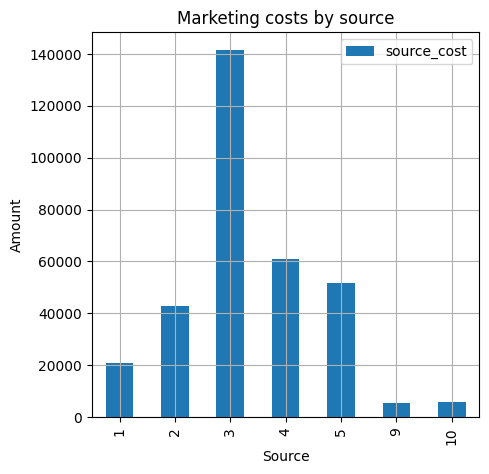

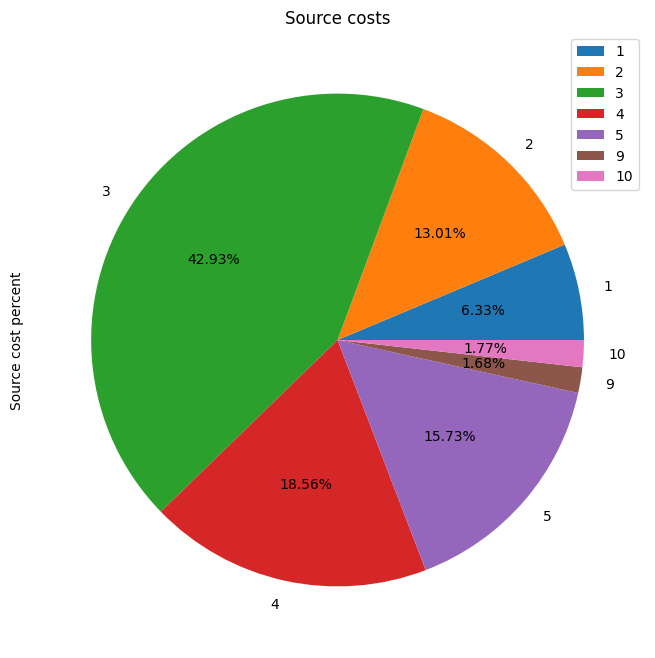

In [47]:
costs_by_source = df_costs.groupby('source_id').agg({'costs':'sum'}).reset_index()
costs_by_source.columns = ['source_id', 'source_cost']
costs_by_source['cost_percent'] = ((costs_by_source['source_cost'] / costs_by_source['source_cost'].sum())*100).round(2)
display(costs_by_source)
costs_by_source.plot(kind='bar', x='source_id', y='source_cost', title='Marketing costs by source', figsize=[5,5], grid=True, xlabel='Source', ylabel='Amount')
costs_by_source.plot(kind='pie', x='source_id', y='cost_percent', title='Source costs', autopct='%1.2f%%', figsize=[8,8], ylabel='Source cost percent', labels=costs_by_source['source_id'])
plt.show()

Se observa que los mayores costos se corresponden a las fuentes:  
* Fuente 2 - 13.01% del total  
* Fuente 3 - 42.94% del total  
* Fuente 4 - 18.56% del total  
* Fuente 5 - 15.73% del total  

##### Costos a lo largo del tiempo

Para calcular los costos a lo largo del tiempo, se tomarán los meses como unidad de tiempo, para lo cual se creará una columna para los meses a partir de la columna con la fecha de los gastos, agrupando posteriormente por cada mes y calculando los costos totales.

In [48]:
df_costs['dt_month'] = df_costs['dt'].dt.to_period('M')
df_costs.head()

,source_id,dt,costs,dt_month
0,1,2017-06-01,75.20,2017-06
1,1,2017-06-02,62.25,2017-06
2,1,2017-06-03,36.53,2017-06
3,1,2017-06-04,55.00,2017-06
4,1,2017-06-05,57.08,2017-06


,costs
dt_month,
2017-06,18015.00
2017-07,18240.59
2017-08,14790.54
2017-09,24368.91
2017-10,36322.88
2017-11,37907.88
2017-12,38315.35
2018-01,33518.52
2018-02,32723.03


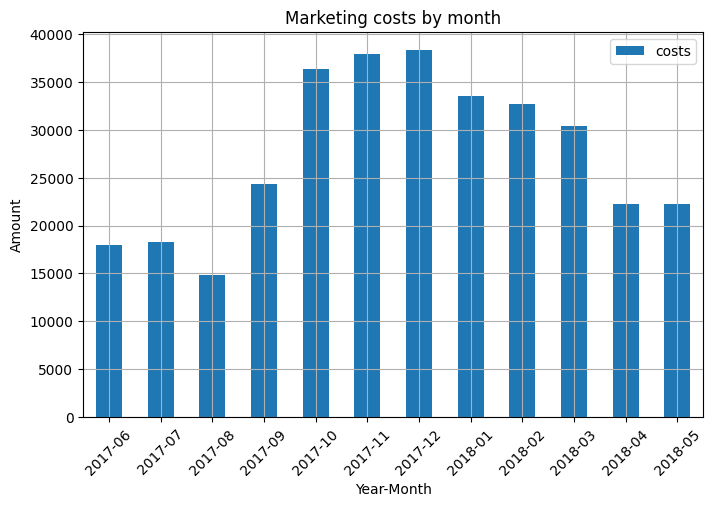

In [49]:
costs_by_time = df_costs.groupby('dt_month').agg({'costs':'sum'})
display(costs_by_time)
costs_by_time.plot(kind='bar', title='Marketing costs by month', figsize=[8,5], grid=True, xlabel='Year-Month', ylabel='Amount', rot=45)
plt.show()


Se observa que los meses de mayores gastos en marketing fueron de octubre a diciembre del 2017.  
Se puede observar en forma rápida que los meses de mayores gastos en marketing coinciden con los meses de mayor cantidad de ventas.

#### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes? (CAC)

El CAC (costo de adquisición de clientes) es el costo de atraer a cada cliente: el dinero que un nuevo cliente le cuesta a una empresa.  
Se determinará el CAC para cada una de las fuentes de marketing, calculando la cantidad de clientes nuevos atraidos por las mismas.

In [50]:
new_clients_by_source = df_visits_full.query('cohort != "no buy"').groupby('source_id').agg({'uid':'nunique'})
new_clients_by_source.columns = ['new_clients']
new_clients_by_source

,new_clients
source_id,
1,7138
2,7305
3,13846
4,14253
5,10156
7,1
9,2793
10,1773


Se detecta que la fuente número '7' tiene solamente 1 (uno) cliente nuevo, y que en el análisis de los costos no se encuentra dicha fuente, por lo que se elige despreciar la misma.

In [51]:
costs_by_source_and_clients = costs_by_source.merge(new_clients_by_source, on='source_id')
costs_by_source_and_clients

,source_id,source_cost,cost_percent,new_clients
0,1,20833.27,6.33,7138
1,2,42806.04,13.01,7305
2,3,141321.63,42.94,13846
3,4,61073.60,18.56,14253
4,5,51757.10,15.73,10156
5,9,5517.49,1.68,2793
6,10,5822.49,1.77,1773


,source_id,cac
0,1,2.918642
1,2,5.859828
2,3,10.206676
3,4,4.284965
4,5,5.096209
5,9,1.975471
6,10,3.283976


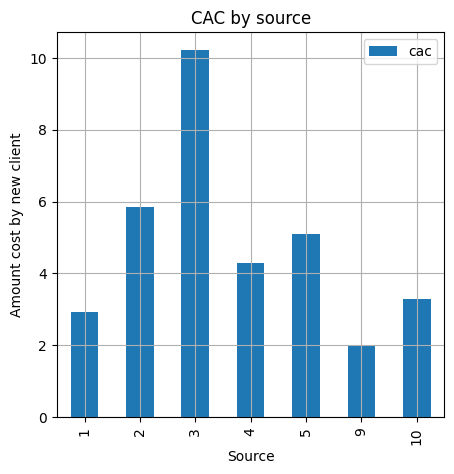

In [52]:
costs_by_source_and_clients['cac'] = costs_by_source_and_clients['source_cost'] / costs_by_source_and_clients['new_clients']
display(costs_by_source_and_clients[['source_id', 'cac']])
costs_by_source_and_clients.plot(kind='bar', x='source_id', y='cac', title='CAC by source', figsize=[5,5], grid=True, xlabel='Source', ylabel='Amount cost by new client')
plt.show()

Conclusiones:  
* Se observa que el mayor costo de adquisición de nuevos clientes es el correspondiente a la fuente de anuncios '3', aún siendo una de las fuentes que mayor cantidad de nuevos clientes atrajo.  
* La fuente de anuncios '9' es la que menor costo de adquisición de nuevos clientes posee, pero se observa también que es el canal que menor cantidad de nuevos clientes atrajo, por lo que no parece una opción conveniente de invertir.  
* La fuente de anuncios '4' es la que mayor cantidad de nuevos clientes atrajo y el costo por adquisición de cliente es mucho menor que la '3' ó la '5' (otras fuentes con gran atracción de nuevos clientes).  
* También se observa que la fuente de anuncios '1' tiene un costo de adquisición de nuevos clientes bajo en comparación a los demás, y el nivel de atracción de nuevos clientes es considerablemente mayor respecto a la fuente '9', aún teniendo un CAC mayor que la misma, por lo que pareciera ser una buena opción de inversión de marketing.


#### ¿Cuán rentables eran las inversiones? (ROMI)

La rentabilidad de las inversiones se puede medir con el ROMI, (retorno de la inversión en marketing), que puede calcularse dividiendo el LTV por el CAC.  
Dado que el LTV fue calculado en función del ciclo de vida de las cohortes, divididas según el mes de la primera compra, se calculará el CAC con los costos mensuales, para luego calcular el ROMI acumulado, y finalmente obtener los valores del ROMI para la cohorte promedio.

In [53]:
#Visualizo las tablas de 'report' y 'costs_by_time'
display(report.head())
display(costs_by_time.head())

,first_order_month,n_buyers,buy_month,revenue,gp,ltv,age
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,2.362207,0
1,2017-06-01,2023,2017-07-01,981.82,490.910,0.242664,1
2,2017-06-01,2023,2017-08-01,885.34,442.670,0.218819,2
3,2017-06-01,2023,2017-09-01,1931.30,965.650,0.477336,3
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,0.511265,4


,costs
dt_month,
2017-06,18015.00
2017-07,18240.59
2017-08,14790.54
2017-09,24368.91
2017-10,36322.88


Se deberá agregar a la tabla 'report' la correspondiente a los costos mensuales, para lo cual se deberán homogenizar sus tipos de datos.

In [54]:
costs_by_time = costs_by_time.reset_index()
costs_by_time['dt_month'] = costs_by_time['dt_month'].astype('datetime64[ns]')
costs_by_time.head()

,dt_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88


In [55]:
#Fusiono ambos dataframes según el mes de la primera compra
report = report.merge(costs_by_time, left_on='first_order_month', right_on='dt_month')

#Calculo el CAC como el cociente entre la columna 'costs' y la 'n_buyers'
report['cac'] = report['costs'] / report['n_buyers']
report

,first_order_month,n_buyers,buy_month,revenue,gp,ltv,age,dt_month,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,2.362207,0,2017-06-01,18015.00,8.905091
1,2017-06-01,2023,2017-07-01,981.82,490.910,0.242664,1,2017-06-01,18015.00,8.905091
2,2017-06-01,2023,2017-08-01,885.34,442.670,0.218819,2,2017-06-01,18015.00,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,965.650,0.477336,3,2017-06-01,18015.00,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,0.511265,4,2017-06-01,18015.00,8.905091
...,...,...,...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,531.525,0.150446,1,2018-03-01,30415.27,8.608907
74,2018-03-01,3533,2018-05-01,1114.87,557.435,0.157780,2,2018-03-01,30415.27,8.608907
75,2018-04-01,2276,2018-04-01,10600.69,5300.345,2.328798,0,2018-04-01,22289.38,9.793225
76,2018-04-01,2276,2018-05-01,1209.92,604.960,0.265800,1,2018-04-01,22289.38,9.793225


In [56]:
#Se calcula el ROMI como el cociente entre el LTV y el CAC
report['romi'] = report['ltv'] / report['cac']

#Se genera un informe con una tabla dinámica, calculando el valor del ROMI acumulado en el ciclo de vida de cada cohorte
output_romi = report.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')
output_romi.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.27,0.29,0.32,0.37,0.43,0.47,0.52,0.56,0.59,0.62,0.65,0.67
2017-07-01,0.32,0.33,0.37,0.39,0.40,0.40,0.41,0.42,0.43,0.43,0.44,NaN
2017-08-01,0.24,0.27,0.29,0.31,0.33,0.34,0.35,0.37,0.38,0.39,NaN,NaN
2017-09-01,0.30,0.36,0.39,0.60,0.62,0.65,0.69,0.70,0.71,NaN,NaN,NaN
2017-10-01,0.30,0.33,0.34,0.35,0.36,0.37,0.37,0.38,NaN,NaN,NaN,NaN
2017-11-01,0.28,0.30,0.31,0.33,0.34,0.34,0.34,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.27,0.29,0.34,0.40,0.42,0.44,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.21,0.22,0.24,0.25,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.23,0.25,0.25,0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se observa que las cohortes aún no han compensado los costos de marketing en el período analizado, aunque se ve un crecimiento en su valor acumulado.  
Se estudia a continuación la cohorte promedio.

age
0     0.27
1     0.29
2     0.32
3     0.36
4     0.39
5     0.43
6     0.45
7     0.48
8     0.53
9     0.48
10    0.55
11    0.67
dtype: float64

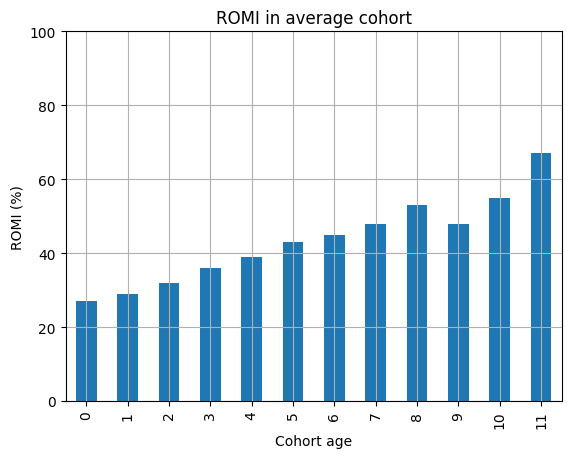

In [57]:
display(output_romi.cumsum(axis=1).mean(axis=0).round(2))
((output_romi.cumsum(axis=1).mean(axis=0).round(2))*100).plot(kind='bar', title='ROMI in average cohort', xlabel='Cohort age', ylabel='ROMI (%)', ylim=[0, 100], grid=True)
plt.show()

En el mes 11 la recuperación de la inversión aún se encuentra solo en un 67% del costo total, aunque va aumentando en general mes a mes.

## Paso 3: Conclusiones y recomendaciones

### Resumen del análisis, resultados y observaciones

En el presente análisis se estudió:
* Visitas y sesiones de usuarios:  
    * Actividad de los usuarios a través de las métricas:  
        * **DAU**: usuarios activos diarios promedio. Dio un valor de **907** usuarios diarios en promedio.  
        * **WAU**: usuarios activos semanales promedio. Dio un valor de **5716** usuarios semanales en promedio.  
        * **MAU**: usuarios activos mensuales promedio. Dio un valor de **23228** usuarios mensuales en promedio.  
    * Cantidad de sesiones diarias promedio por usuario: 1.08 veces al día.  
    * Duración de las sesiones, a través de la métrica:  
        * **ASL**: duración media de la sesión. Se determinó a través de la duración de sesión más frecuente, que dio un tiempo de **60 segundos**.  
    * Frecuencia con la que los usuarios regresan, a través de la métrica:  
        * Sticky factor semanal (**DAU/WAU**): **15.9%**  
        * Sticky factor mensual (**DAU/MAU**): **3.9%**  

* Ventas:  
    * Tiempos de conversión en clientes:  
        * El 50% de los clientes realiza su primera compra en el mismo día del registro, o al siguiente.  
        * El 25% de los clientes realiza su primera compra en menos de cuarenta días.  
        * El dispositivo de escritorio (desktop) es el preferido en general para acceder a la aplicación, y las compras a través del mismo superan notablemente a las compras realizadas por el dispositivo 'touch'.  
        * Se observa que la mayor conversión de clientes se dio para quienes accedieron a la aplicación por primera vez en el mes de Octubre del 2017.  
    * Cantidad de compras en función del tiempo:  
        * Cohortes por tiempo de conversión: 
            * La cohorte que más compra realiza a lo largo del tiempo es la que realiza su compra en el mismo día del registro (00d).  
            * Se observa que en los meses de octubre a diciembre del 2017 (los meses de mayor conversión), son también los meses que mayor cantidad de compras en general se hizo.  
        * Cohortes según la fecha de la primera compra:  
            * Se observa que, tal como se esperaba, la mayor cantidad de compras fueron realizadas en el mismo mes de la primera compra, y, considerando lo observado en el análisis por las cohortes de conversión, podemos estimar que la mayor parte de las mismas se realizaron el mismo día del registro (cohorte '00d'). Esto indica que son muy pocas las ventas realizadas a los mismos usuarios posteriormente al registro.  
            * Se observa, al igual que en los casos anteriores, que en los meses de octubre a diciembre del 2017 se incrementaron las compras de los usuarios en general.  
            * Se observa que la diferencia entre el total de compras realizadas respecto de las realizadas únicamente por usuarios diferentes no es significativa, por lo que se podría concluir que la mayor parte de los pedidos vienen de usuarios nuevos, lo cual también podría ser causante del hecho de que el mayor volumen de pedidos sean realizados en el día 0.  
    * Tamaño promedio de compra:  
        * Se observa que el tamaño promedio de la compra se encuentra comprendido entre $4.5 y $8.  
        * Se destaca que las compras promedio de la cohorte que convirtió en el mismo día de registro son las más bajas (aunque mayor cantidad de compras), mientras que las realizadas posteriormente a la primera semana, pero dentro del primer mes, son las más altas.  
    * Cantidad de dinero que traen los clientes:  
        * Se mide con la métrica LTV (valor de vida del cliente)  
        * Cada usuario, en promedio, trae entre $2.0 y $3.0.
        * Se observa un máximo de $6.0 en promedio por usuario para la cohorte del mes de setiembre del 2017.  
* Costos de marketing:  
    * Análisis de costos:  
        * Costo total fue de $ 329131.62  
        * Costos por fuente de adquisición: los mayores costos se corresponden a las fuentes de anuncios:  
            * Fuente 2 - 13.01% del total  
            * Fuente 3 - 42.94% del total  
            * Fuente 4 - 18.56% del total  
            * Fuente 5 - 15.73% del total
        * Costos en función del tiempo: se observa que los meses de mayores gastos en marketing fueron de octubre a diciembre del 2017. 
    *  Costos de adquisición de clientes (CAC) por fuente de anuncio:  
        * Se observa que el mayor costo de adquisición de nuevos clientes es el correspondiente a la fuente de anuncios '3', aún siendo una de las fuentes que mayor cantidad de nuevos clientes atrajo.  
        * La fuente de anuncios '9' es la que menor costo de adquisición de nuevos clientes posee, pero se observa también que es el canal que menor cantidad de nuevos clientes atrajo.  
        * La fuente de anuncios '4' es la que mayor cantidad de nuevos clientes atrajo y el costo por adquisición de cliente es mucho menor que la '3' ó la '5' (otras fuentes con gran atracción de nuevos clientes).  
        * También se observa que la fuente de anuncios '1' tiene un costo de adquisición de nuevos clientes bajo en comparación a los demás, y el nivel de atracción de nuevos clientes es considerablemente mayor respecto a la fuente '9', aún teniendo un CAC mayor que la misma.  
    * Rentabilidad de las inversiones:  
        * Se mide con la métrica ROMI (return of marketing investment)  
        * Para la cohorte promedio, el ROMI acumulado en todo el período en estudio tiene un valor de **0.67**, lo cual significa que en el mes 11 la recuperación de la inversión aún se encuentra solo en un 67% del costo total, aunque también se observa que dicha métrica va aumentando en general mes a mes.



### Recomendaciones al departamento de marketing

En base al análisis efectuado, se procede a realizar las siguientes recomendaciones en cuanto al marketing, a fin de incrementar las ventas en la aplicación:  
* La fuente de anuncios '3' atrae una gran cantidad de clientes, y fue en la fuente que más se invirtió, pero claramente el costo de adquisición es muy elevado, por lo que se sugiere invertir menos en dicha fuente para reducir los costos.  
* La fuente de anuncios '4' es una fuente conveniente para continuar invirtiendo, ya que es la que mayor cantidad de clientes nuevos atrajo, y tiene un costo de adquisición mucho menor que la anterior.  
* Se sugiere invertir más en la fuente de anuncios '1', dado que se observa que tiene una importante atracción de nuevos clientes, y el costo de adquisición es sensiblemente menor.  
* Dado que la mayor cantidad de sesiones y compras se dan desde dispositivos de escritorio, se sugiere:  
    * Invertir más en fuentes de anuncio que sean más adecuadas para equipos de escritorio.  
    * A la vez, hacer una evaluación de las opiniones y calificaciones de los usuarios del dispositivo 'touch', a fin de mejorar la aplicación y poder captar a aquellos clientes que, por no encontrar adecuada la aplicación, cierran la sesión, y desisten de comprar.  
* Dado que la mayor cantidad de ventas se dan solamente en el primer día, la mayoría por clientes nuevos, y que las compras más altas se dan para usuarios con mayor retención, se sugiere evaluar una metodología para hacer volver a los usuarios a la aplicación. Podría ser enviando mails con promociones, notificaciones en sus dispositivos móviles, etc.  
* Dado que en los meses de octubre a diciembre del 2017 se incrementaron en gran manera las visitas y las ventas, se sugiere evaluar cuáles fueron los cambios en la aplicación y/o en las estrategias de marketing en dichas fechas, a fin de repetirlas, o bien, usarlas como base para nuevas estrategias.